<a href="https://colab.research.google.com/github/JSJeong-me/Introduction-to-Data-Analysis-with-DL-and-ML/blob/main/4-Data-Analysis/63-BBB-prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python
import pandas as pd
from prophet import Prophet

In [2]:
import prophet
print(prophet.__version__)


1.1.5


In [3]:
df = pd.read_excel('BBB.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
df.head()

In [4]:
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [5]:
df.head()

,y
TS,
2019-05-01 00:15:00,43.68
2019-05-01 00:30:00,42.36
2019-05-01 00:45:00,41.40
2019-05-01 01:00:00,39.96
2019-05-01 01:15:00,41.04


In [6]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [7]:
df_day.index

RangeIndex(start=0, stop=337, step=1)

In [8]:
df_day.drop(df_day.index[336], inplace=True)

In [9]:
df_day.tail()

,ds,y
331,2020-03-27,8176.44
332,2020-03-28,4907.76
333,2020-03-29,4293.60
334,2020-03-30,9195.84
335,2020-03-31,8639.76


In [ ]:
# 모델을 초기화합니다.
# m = Prophet(yearly_seasonality=True,
#             weekly_seasonality=True,
#             daily_seasonality=True,
#             uncertainty_samples=1000)

In [10]:
m = Prophet(yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True, uncertainty_samples=1000)

In [11]:
# 한국의 공식 휴일을 추가합니다.
m.add_country_holidays(country_name='KR')

In [12]:
# 사용된 휴일을 확인할 수 있습니다.
print(m.train_holiday_names)

None


In [13]:
m.fit(df_day)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfgb4u9te/cqb6dzzq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfgb4u9te/po6i6rpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59223', 'data', 'file=/tmp/tmpfgb4u9te/cqb6dzzq.json', 'init=/tmp/tmpfgb4u9te/po6i6rpe.json', 'output', 'file=/tmp/tmpfgb4u9te/prophet_modeltkoqrg1h/prophet_model-20240418081158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
future = m.make_future_dataframe(30, freq='D') # Forecasting 7 days

In [ ]:
future.tail(30)

In [17]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

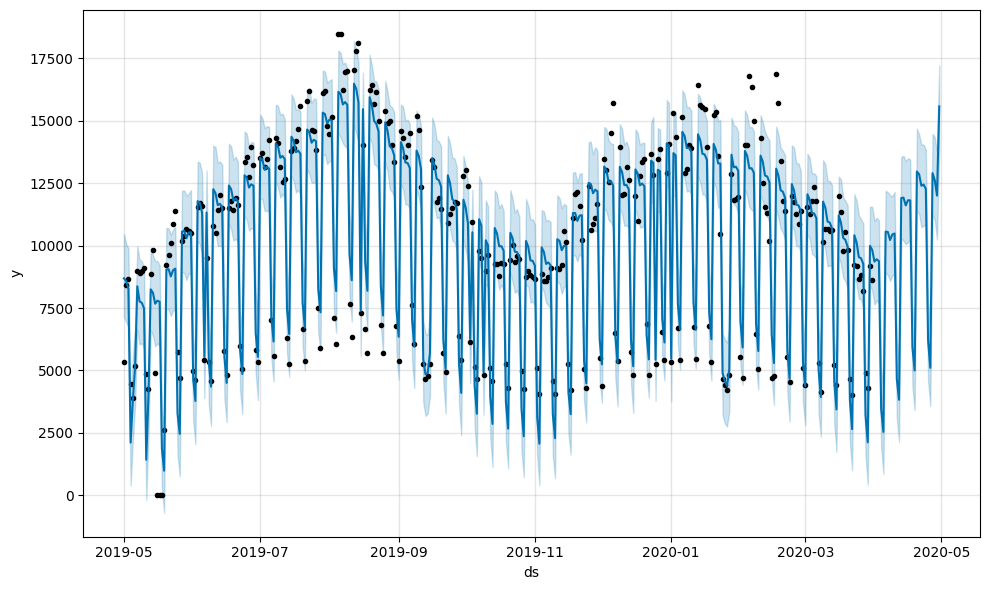

In [19]:
fig1 = m.plot(forecast)

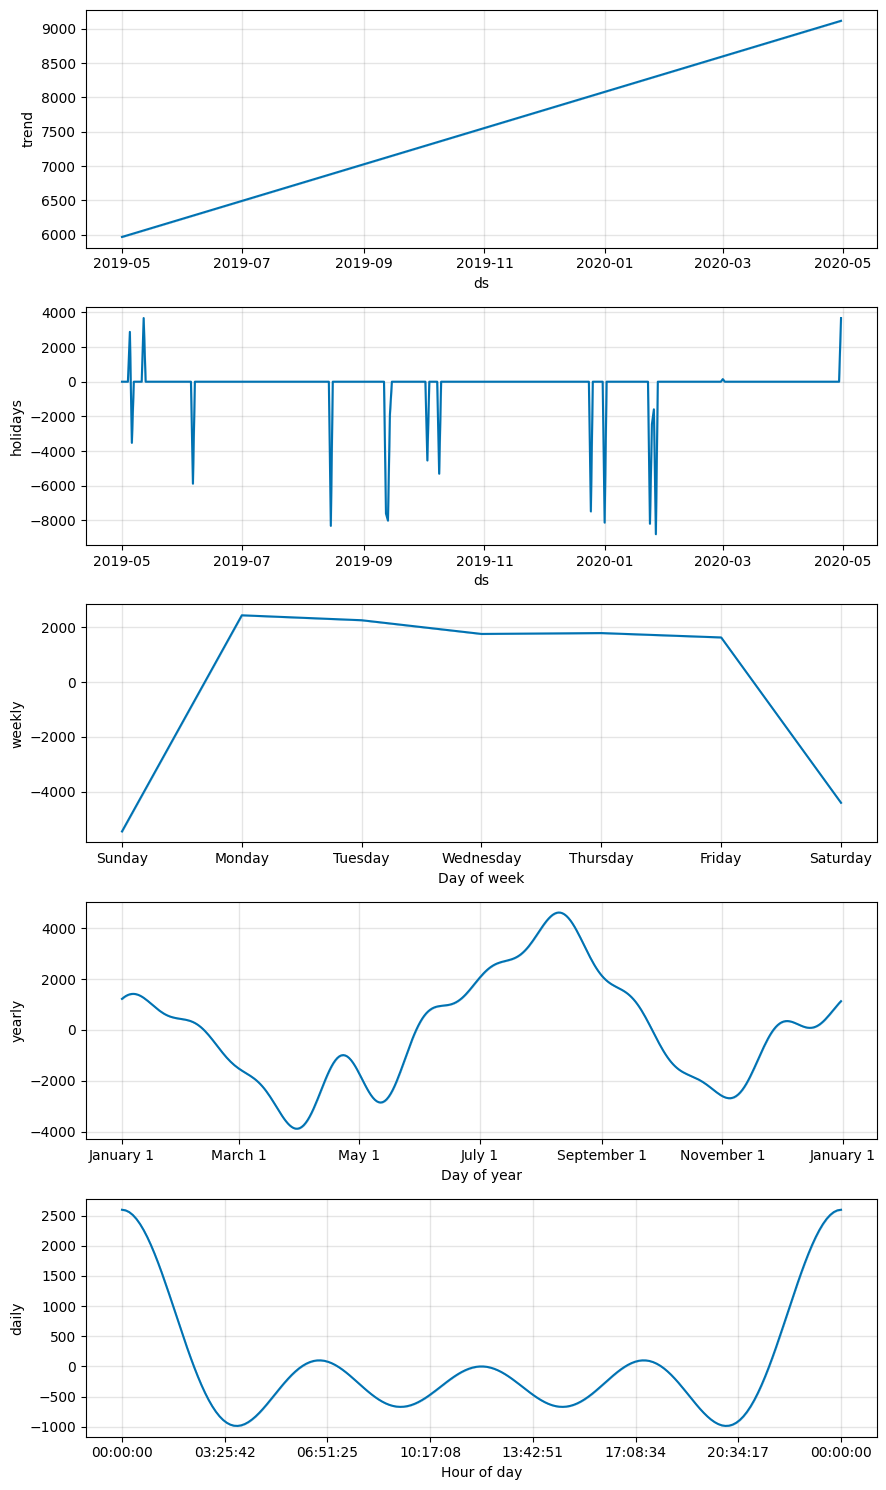

In [20]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [ ]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)